# Introduction

This is a home assignment for the role - Data Science. Please follow the instructions:
1. The main goal of this assignment is to analyze/extract topics within a huge corpus.
2. The primary language to use in this exercise is Python (and its auxiliary packages of your choice) on top of Jupyter Notebook.
3. Your code should be research-grade, as detailed below:
    a. The code should be reliable (think of the correctness and edge cases).
    b. The code should be readable and maintainable.
    c. Take (some) memory efficiency into consideration while solving the problem.
    d. The data visualization should be functional enough to support the answers.
4. The solution should be extensible:
    a. Work iteratively within the given time frame to get something before you deepen your research.
    b. Think of the step-by-step implementation.
    c. Being rigorous is important for the maintenance, correctness, and flexibility of the results, but try to be concise and elegant where possible.
5. We value your time. The whole assignment should take roughly 0.5-1 day. If you think it will take longer, please let us know ahead of time.

Good Luck!


# Objective
Analyze a dataset of headlines. First - clean, explore, and tokenize the text. Then, apply common NLP methods used for topic modeling.


---
# Part 1 - Data cleaning and exploration
1. Load the attached dataset using Pandas.
2. Clean and prepare the data for analysis by performing the following tasks:
    a. Remove missing values.
    b. Handle any outliers present in the data.
    c. Convert any non-numeric columns to numeric/date (when possible).
    d. Tokenize / clean to your understanding.
3. Perform an EDA of your choice to help you understand the data.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Constants

In [93]:
TOKEN_MIN_LENGTH = 3

In [2]:
# load data
df = pd.read_csv('data-text.csv')
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


## Data Characteristics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1244184 non-null  int64 
 1   headline_text  1244184 non-null  object
dtypes: int64(1), object(1)
memory usage: 19.0+ MB


In [4]:
# a simple check for duplicated rows
duplicated_rows = df.duplicated().sum()
print(f'Number of duplicated rows: {duplicated_rows}')

# remove duplicated rows
df.drop_duplicates(inplace=True, keep='first')
print(f'Number of rows after duplicated removed: {len(df)}')

Number of duplicated rows: 2
         publish_date                                     headline_text
1232754      20210301  house prices record sharpest increase since 2003
1237050      20210601    house prices reach record levels; as investors
Number of rows after duplicated removed: 1244182


In [5]:
df.isna().sum()  # check for missing values
# df.dropna(inplace=True)  # remove missing values

publish_date     0
headline_text    0
dtype: int64

^ No need to remove missing values since there are none.

In [6]:
# convert 'publish_date' column to date
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y%m%d')
df.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [9]:
# create new feature columns
df['publish_month'] = df['publish_date'].apply(lambda x: x.month)
df['publish_year'] = df['publish_date'].apply(lambda x: x.year)
df['headline_length'] = df['headline_text'].apply(lambda x: len(x))
df['headline_word_count'] = df['headline_text'].apply(lambda x: len(x.split()))
df.head()

,publish_date,headline_text,headline_length,headline_word_count,publish_month,publish_year
0,2003-02-19,aba decides against community broadcasting lic...,50,6,2,2003
1,2003-02-19,act fire witnesses must be aware of defamation,46,8,2,2003
2,2003-02-19,a g calls for infrastructure protection summit,46,7,2,2003
3,2003-02-19,air nz staff in aust strike for pay rise,40,9,2,2003
4,2003-02-19,air nz strike to affect australian travellers,45,7,2,2003


## check for outliers

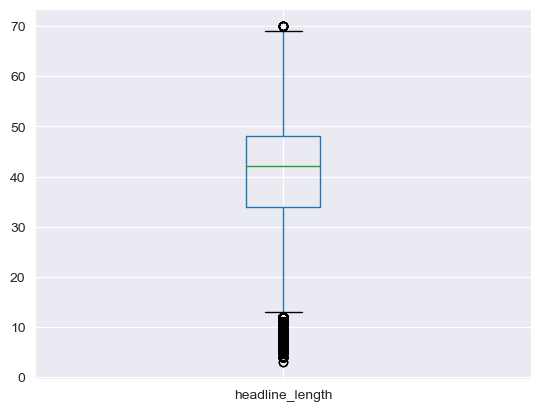

In [10]:
df[['headline_length']].boxplot()
plt.show()

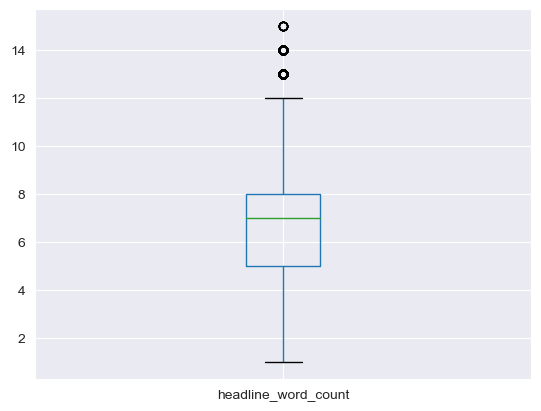

In [11]:
# check for outliers
df[['headline_word_count']].boxplot()
plt.show()

In [88]:
df[df['headline_length'] < 13]

,publish_date,headline_text,headline_length,headline_word_count,publish_month,publish_year
904,2003-02-23,nataus,6,1,2,2003
2054,2003-02-28,natwa,5,1,2,2003
3395,2003-03-06,test test,9,2,3,2003
7219,2003-03-25,sptcri,6,1,3,2003
7220,2003-03-25,sptrby,6,1,3,2003
...,...,...,...,...,...,...
1242076,2021-10-29,jana pittman,12,2,10,2021
1242107,2021-10-31,done deal,9,2,10,2021
1242324,2021-11-07,jaccuse,7,1,11,2021
1242561,2021-11-15,beal,4,1,11,2021


In [91]:
df[df['headline_word_count'] < 2]

,publish_date,headline_text,headline_length,headline_word_count,publish_month,publish_year
3395,2003-03-06,test test,9,2,3,2003
8998,2003-04-02,test test,9,2,4,2003
11215,2003-04-14,crn tnv,7,2,4,2003
11348,2003-04-14,tnv crn,7,2,4,2003
19649,2003-05-25,hollingworth resigns,20,2,5,2003
...,...,...,...,...,...,...
1242908,2021-11-24,wallerawang demolition,22,2,11,2021
1243066,2021-11-30,nols normannbk,14,2,11,2021
1243422,2021-12-08,eleanor beidatsch,17,2,12,2021
1243915,2021-12-22,handfish spotted,16,2,12,2021


In [ ]:
# remove outliers?
# df = df[df['headline_length'] >= 13]
# df = df[df['headline_word_count'] >= 2]

In [ ]:
# def get_avg_word_len(x):
#     """Get the average word length from a given sentence
#     param x(str): the sentence of whose word length is to be taken
#     return leng(numeric): the average word length """
#
#     words = x.split()
#     word_len = 0
#     for word in words:
#         word_len = word_len + len(word)
#     return word_len / len(words)
#
#
# def feature_extract(df, d):
#     """Adds new columns in the given df, from the existing data
#     count: number of words in the document (df[d])
#     char count: number of characters in df[d]
#     avg word_len: the average number of characters in the df[d]
#     stop_words_len: number of stopwords present
#     numeric_count: number of numeric characters present
#     upper_counts: number of words in CAPS LOCK
#     polarity: sentiment of the word, from -1(negative) to 1(positive)
#
#     param df(dataframe): dataframe on which manipulation is to be done
#     param d(str): column name in which the reuired words are present"""
#
#     df['count'] = df[d].apply(lambda x: len(str(x).split()))
#     df['char count'] = df[d].apply(lambda x: len(x))
#     df['avg word_len'] = df[d].apply(lambda x: get_avg_word_len(x))
#     df['stop_words_len'] = df[d].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))
#     df['numeric_count'] = df[d].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
#     df['upper_counts'] = df[d].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x) > 3]))
#     df['polarity'] = df['document'].map(lambda text: TextBlob(text).sentiment.polarity)

## Tokenize

In [98]:
data_text = df[['headline_text']].copy()
data_text['index'] = data_text.index
documents = data_text

print(len(documents))
documents.head()

1244182


,headline_text,index
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4


In [92]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk

np.random.seed(2018)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neshe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [94]:
stemmer = SnowballStemmer('english')


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


def preprocess(text):
    result = []

    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > TOKEN_MIN_LENGTH:
            result.append(lemmatize_stemming(token))

    return result

In [101]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
words = []
print('original document:')

for word in doc_sample.split(' '):
    words.append(word)

print(words)
print('\n\n tokenized and lemmatized document:')
print(preprocess(doc_sample))

original document:
['ratepayers', 'group', 'wants', 'compulsory', 'local', 'govt', 'voting']


 tokenized and lemmatized document:
['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']


In [102]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs.head()

0     [decid, communiti, broadcast, licenc]
1                        [wit, awar, defam]
2    [call, infrastructur, protect, summit]
3               [staff, aust, strike, rise]
4      [strike, affect, australian, travel]
Name: headline_text, dtype: object

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [115]:
[(k, v) for i, (k, v) in enumerate(dictionary.iteritems()) if i < 10]

[(0, 'broadcast'),
 (1, 'communiti'),
 (2, 'decid'),
 (3, 'licenc'),
 (4, 'awar'),
 (5, 'defam'),
 (6, 'wit'),
 (7, 'call'),
 (8, 'infrastructur'),
 (9, 'protect')]

In [116]:
'''
Gensim filter_extremes

Filter out tokens that:
    appear in less than 15 documents (absolute number) or
    more than 0.5 documents (fraction of total corpus size, not absolute number).

After the above two steps, keep only the first 100000 most frequent tokens.
'''

NO_BELOW = 15
NO_ABOVE = 0.5
KEEP_N = 100000

dictionary.filter_extremes(no_below=NO_BELOW, no_above=NO_ABOVE, keep_n=KEEP_N)

In [118]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(162, 1), (240, 1), (292, 1), (589, 1), (838, 1), (3571, 1), (3572, 1)]

## EDA

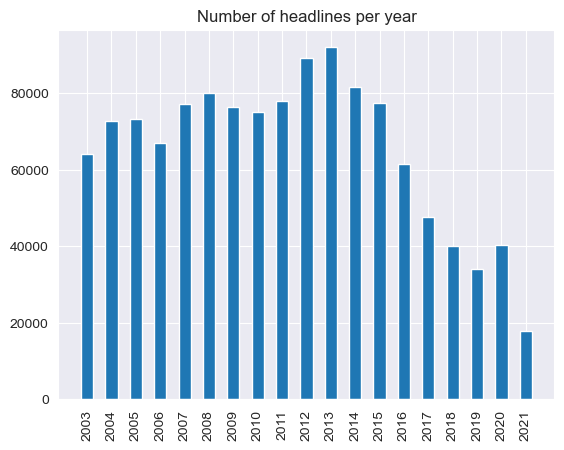

In [77]:
# bar plot of number of headlines per year
headlines_per_year = df['publish_year'].value_counts()

plt.bar(headlines_per_year.index, headlines_per_year, width=0.5)
plt.xticks(headlines_per_year.index, rotation=90)
plt.title('Number of headlines per year')
plt.show()

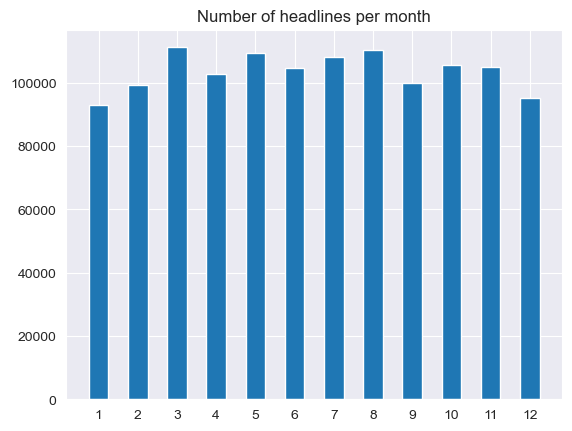

In [81]:
# bar plot of number of headlines per month
headlines_per_month = df['publish_month'].value_counts()

plt.bar(headlines_per_month.index, headlines_per_month, width=0.5)
plt.xticks(headlines_per_month.index)
plt.title('Number of headlines per month')
plt.show()

---
# Part 2 - Topic modeling
Attempt at least one topic modeling method of your choice to cluster the headlines into topics.
1. Since we cannot determine the number of topics in advance, experiment sensibly to assess a reasonable amount of topics.
2. Devise a method (either computationally, graphically, or both) to decide about the number of topics, and then match headlines to topics.
3. Try to estimate somehow the matching error.

---
# Part 3 - Bonus
Compare the method with an additional topic modeling method.